In [2]:
import matplotlib.pyplot as plt
import numpy as np
# import taufactor as tau
import glob
import seaborn as sns
import pandas as pd

In [3]:
sns.set_theme()

## Data processing
* make a dataframe consisting of labelling time

In [ ]:
jsonpath = 'runs/louis_iterative/'

In [43]:
runs = glob.glob('runs/*')
iterative = []

for run in runs:
    if run[-9:] == 'iterative':
        iterative.append(run)


final_outputs =[]
for run in iterative:
    prev_max = 0
    for file in glob.glob(run+'\data\*.png'):
        if 'output' in file:
            epoch = int(''.join(filter(str.isdigit, file)))
            if epoch > prev_max or prev_max == 0:
              final = file
              prev_max = epoch
    final_outputs.append(final)

print(final_outputs)

['runs\\arber-iterative\\data\\output_17551.png', 'runs\\freddie-iterative\\data\\output_10352.png', 'runs\\louis-iterative\\data\\output_11221.png', 'runs\\tsz-ming-iterative\\data\\output_12294.png', 'runs\\yiluo-iterative\\data\\output_15949.png', 'runs\\zian-iterative\\data\\output_13151.png']


In [44]:
from taufactor.metrics import volume_fraction
from taufactor.metrics import surface_area

vfs = []
sas = []

for output_path in final_outputs:
    img = plt.imread(output_path)
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=3)
    vf = volume_fraction(img, phases={'pore':0, 'particle':1})
    vfs.append(vf)
    sa = surface_area(img, phases=1)
    sas.append(sa)

print (vfs, sas)

[{'pore': 0.4705047607421875, 'particle': 0.5294952392578125}, {'pore': 0.41777801513671875, 'particle': 0.5822219848632812}, {'pore': 0.5473861694335938, 'particle': 0.45261383056640625}, {'pore': 0.4541015625, 'particle': 0.5458984375}, {'pore': 0.5155296325683594, 'particle': 0.4844703674316406}, {'pore': 0.5116996765136719, 'particle': 0.4883003234863281}] [array(0.38981563), array(0.42617643), array(0.33890139), array(0.40125193), array(0.35963846), array(0.36305706)]


In [9]:
# load image
path = 'runs/louis-iterative/data/output_11221.png'
img = plt.imread(path)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=3)
print(img.shape)

(1, 512, 512, 1)


In [12]:
from taufactor.metrics import volume_fraction
from taufactor.metrics import surface_area

# calculate the volume fraction
vf = volume_fraction(img)

# consider a three phase image with pore, particle and binder
# where 0, 1, 2 correspond to pore, particle and binder respectively
# calculate the volume fraction
vf = volume_fraction(img, phases={'pore':0, 'particle':1})
print(vf)

sa = surface_area(img, phases=1)
print(sa)

{'pore': 0.5473861694335938, 'particle': 0.45261383056640625}
0.3389013861867704


converged to: inf after:  21 iterations in:  5.0676 seconds at a rate of 0.2413 s/iter


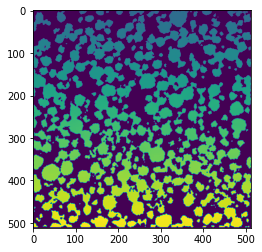

array([[[-1.        ],
        [-1.        ],
        [-1.        ],
        ...,
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        ...,
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        ...,
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       ...,

       [[-1.        ],
        [-1.        ],
        [ 0.49205413],
        ...,
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        ...,
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        ...,
        [-1.        ],
        [-1.        ],
        [-1.        ]]], dtype=float32)

In [8]:
# create a solver object
s = tau.Solver(img)
# call solve function
s.solve()
# view effective diffusivity
D_eff = s.D_eff
# plot steady state maps
s.flux_map()
s.conc_map()